In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

from scipy.stats import shapiro,pearsonr

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

In [2]:
# reading the dataset
df=pd.read_csv(r"C:\Users\Saravanan\Desktop\house.csv")

In [3]:
df.head()

,area,price
0,8450,208500
1,9600,181500
2,11250,223500
3,9550,140000
4,14260,250000


In [4]:
# finding datatypes and total records
df.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   area    1460 non-null   int64
 1   price   1460 non-null   int64
dtypes: int64(2)
memory usage: 22.9 KB


there are two columnthat are numericals
 

In [5]:
# checking stats for dataset
df.describe().style.background_gradient(cmap=('copper'))

,area,price
count,1460.000000,1460.000000
mean,10516.828082,180921.195890
std,9981.264932,79442.502883
min,1300.000000,34900.000000
25%,7553.500000,129975.000000
50%,9478.500000,163000.000000
75%,11601.500000,214000.000000
max,215245.000000,755000.000000


Its seems like area will be having outliers but we'll check later


<AxesSubplot:>

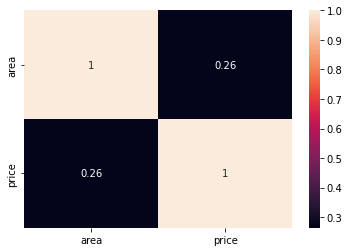

In [7]:
# finding correlation with the target variable to feature variable
sns.heatmap(df.corr(),annot=True)

student hour is hightly correlated with student mark


In [8]:
#checking null values 
df.isnull().sum()

area     0
price    0
dtype: int64

there is no missing values

<AxesSubplot:xlabel='area', ylabel='Density'>

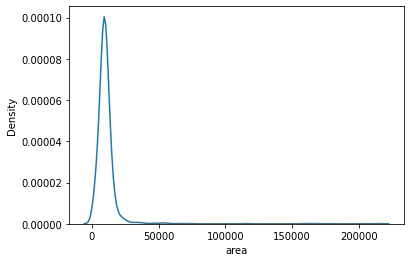

In [9]:
#visualizing for distribution
sns.kdeplot(df.area)

<AxesSubplot:xlabel='price', ylabel='Density'>

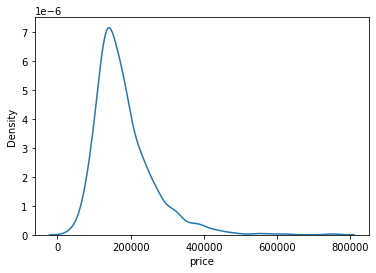

In [10]:
sns.kdeplot(df.price)

In [11]:
def dist_check(x):
    t_value,p_value=shapiro(x)
    if p_value>0.05:
        print("normally distributed",":",p_value)
    else:
        print("not normally distributed",":",p_value)

In [12]:
dist_check(df.area)

not normally distributed : 0.0


In [13]:
dist_check(df.price)

not normally distributed : 3.206247534576162e-33


We do not have null values in this dataset

In [14]:
#checking outliers in the dataset
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [22]:
out=find_outliers_IQR(df)
columns=["area","price"]
for i in columns:
    cout=out[i].dropna()
    print(i,":",cout.index)


area : Int64Index([  53,   66,  113,  120,  159,  171,  185,  197,  249,  260,  271,
             277,  304,  313,  335,  349,  364,  384,  411,  417,  422,  451,
             457,  523,  529,  558,  563,  588,  661,  664,  666,  691,  692,
             706,  726,  769,  807,  828,  848,  854,  876,  934,  939,  943,
             956, 1010, 1039, 1048, 1057, 1061, 1107, 1151, 1169, 1173, 1184,
            1190, 1230, 1260, 1270, 1277, 1287, 1298, 1346, 1383, 1396, 1409,
            1423, 1430, 1446],
           dtype='int64')
price : Int64Index([  11,   53,   58,  112,  151,  161,  178,  185,  224,  231,  278,
             309,  313,  320,  321,  336,  349,  378,  389,  440,  473,  477,
             481,  496,  515,  527,  585,  591,  608,  642,  644,  654,  661,
             664,  678,  688,  691,  702,  718,  769,  774,  798,  803,  825,
             877,  898,  987,  990, 1046, 1142, 1169, 1181, 1182, 1228, 1243,
            1267, 1268, 1353, 1373, 1388, 1437],
           dtype='int

In [32]:
df.drop([  11,  58,  112,  151,  161,  178,  224,  231,  278,
 309, 320,  321,  336, 378,  389,  440,  473,  477,
 481,  496,  515,  527,  585,  591,  608,  642,  644,  654,
  678,  688,   702,  718,  774,  798,  803,  825,
 877,  898,  987,  990, 1046, 1142, 1181, 1182, 1228, 1243,
 1267, 1268, 1353, 1373, 1388, 1437],axis=0,inplace=True)      

In [33]:
df.shape

(1339, 2)

there is no outliers in the dataset

In [35]:
x=df[["area"]]
y=df[["price"]]

<AxesSubplot:xlabel='area', ylabel='price'>

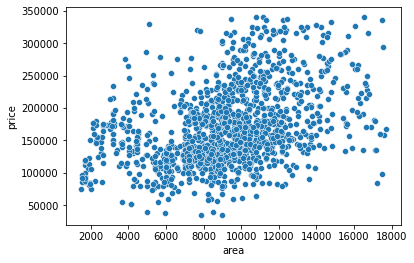

In [36]:
sns.scatterplot(data=df,x="area",y="price")

In [37]:
# first assumption linearity 


def test_linearity(dff):
    new_df=pd.DataFrame(columns=["Feature","Target","pearson_r_value","pvalue","significance"])
    for i in dff.iloc[:,:]:
        for j in dff.iloc[:,:]:
            p=pearsonr(dff[i],dff[j])
            
            if p[1]>0.05:
                new_df=new_df.append({"Feature":i,"Target":j,"pearson_r_value":p[0],"pvalue":p[1],"significance":"Not significant"},ignore_index=True)
            elif p[1]<0.05:
                 new_df=new_df.append({"Feature":i,"Target":j,"pearson_r_value":p[0],"pvalue":p[1],"significance":"significant"},ignore_index=True)


    return new_df

# linearity check

In [38]:
test_linearity(df)

C:\Users\Saravanan\AppData\Local\Temp\ipykernel_10608\388016373.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append({"Feature":i,"Target":j,"pearson_r_value":p[0],"pvalue":p[1],"significance":"significant"},ignore_index=True)
C:\Users\Saravanan\AppData\Local\Temp\ipykernel_10608\388016373.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append({"Feature":i,"Target":j,"pearson_r_value":p[0],"pvalue":p[1],"significance":"significant"},ignore_index=True)
C:\Users\Saravanan\AppData\Local\Temp\ipykernel_10608\388016373.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append({"Feature":i,"Target":j,"pearson_r_value":p[0],"pvalue":p[1],"significance":"significant"},ignore_i

,Feature,Target,pearson_r_value,pvalue,significance
0,area,area,1.000000,0.000000e+00,significant
1,area,price,0.391939,2.102027e-50,significant
2,price,area,0.391939,2.102027e-50,significant
3,price,price,1.000000,0.000000e+00,significant


In [39]:
norm=MinMaxScaler()

In [40]:
scale=norm.fit_transform(df)
scale

array([[0.43009889, 0.56899377],
       [0.50117429, 0.4804982 ],
       [0.60315204, 0.61815798],
       ...,
       [0.46668727, 0.75909538],
       [0.50840544, 0.35144215],
       [0.52200247, 0.36905932]])

In [41]:
df=pd.DataFrame(scale,columns=['area','price'])

In [43]:
x=df[["area"]]
y=df[["price"]]

In [44]:
x

,area
0,0.430099
1,0.501174
2,0.603152
3,0.498084
4,0.789184
...,...
1334,0.397157
1335,0.722126
1336,0.466687
1337,0.508405


In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [46]:
reg=LinearRegression()

In [47]:
reg.fit(x_train,y_train)

LinearRegression()

In [48]:
y_pred=reg.predict(x_train)
y_pred_test=reg.predict(x_test)


In [49]:
print(r2_score(y_train,y_pred))

0.1507080391955583


In [50]:
print(r2_score(y_test,y_pred_test))

0.16446689877042353
